# Task 1
Clean your dataset (remove missing values, sanitize data, etc.). Remove any outliers using the Tukey’s rule from class. Report what you found (number of outliers). Comment on your findings both for data cleaning (what issues you found, how you dealt with them) and outlier detection
NV - Nevada
NM - New Mexico

In [81]:
import pandas as pd
import numpy as np
from collections import Counter
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
from math import *
import datetime 
from datetime import timedelta 
from IPython.core.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing

In [82]:
import pandas as pd

In [83]:

df = pd.read_csv("17.csv")
print(df)

           Date  NM confirmed  NV confirmed  NM deaths  NV deaths
0    2020-01-22             0             0          0          0
1    2020-01-23             0             0          0          0
2    2020-01-24             0             0          0          0
3    2020-01-25             0             0          0          0
4    2020-01-26             0             0          0          0
..          ...           ...           ...        ...        ...
433  2021-03-30        191380        298052       3932       5127
434  2021-03-31        191655        298328       3937       5137
435  2021-04-01        191948        298651       3942       5144
436  2021-04-02        192156        298651       3949       5144
437  2021-04-03        192156        299440       3949       5161

[438 rows x 5 columns]


# DATA PREPROCESSING
Removing the cumulative values and replacing them with per day value of covid cases.

In [84]:
df1 = pd.DataFrame(columns=["Date","NM confirmed","NV confirmed","NM deaths","NV deaths"])
df1['Date'] = df["Date"]
df1['NM confirmed'].loc[0] = 0
df1['NV confirmed'].loc[0] = 0
df1['NM deaths'].loc[0] = 0
df1['NV deaths'].loc[0] = 0

for i in range(1,438):
    df1["NM confirmed"].loc[i] = df["NM confirmed"].loc[i] - df["NM confirmed"].loc[i-1]
    df1["NV confirmed"].loc[i] = df["NV confirmed"].loc[i] - df["NV confirmed"].loc[i-1]
    df1["NM deaths"].loc[i] = df["NM deaths"].loc[i] - df["NM deaths"].loc[i-1]
    df1["NV deaths"].loc[i] = df["NV deaths"].loc[i] - df["NV deaths"].loc[i-1]

df1.to_csv("Cleaned_data.csv")
print(df1)

           Date NM confirmed NV confirmed NM deaths NV deaths
0    2020-01-22            0            0         0         0
1    2020-01-23            0            0         0         0
2    2020-01-24            0            0         0         0
3    2020-01-25            0            0         0         0
4    2020-01-26            0            0         0         0
..          ...          ...          ...       ...       ...
433  2021-03-30          147          406         7         3
434  2021-03-31          275          276         5        10
435  2021-04-01          293          323         5         7
436  2021-04-02          208            0         7         0
437  2021-04-03            0          789         0        17

[438 rows x 5 columns]


# Box Plots  

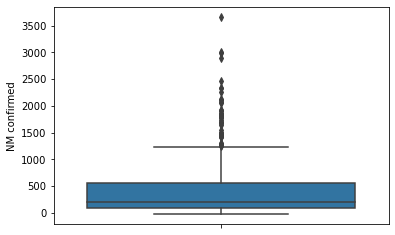

In [85]:
fig1 = sns.boxplot(y=df1['NM confirmed'])

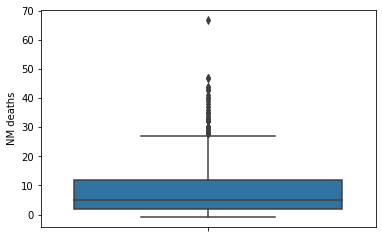

In [86]:
fig2 = sns.boxplot(y=df1['NM deaths'])

fig3 = sns.boxplot(y=df1['NV deaths'])

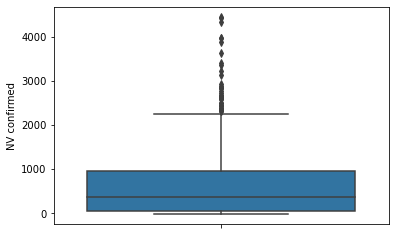

In [87]:
fig4 = sns.boxplot(y=df1['NV confirmed'])

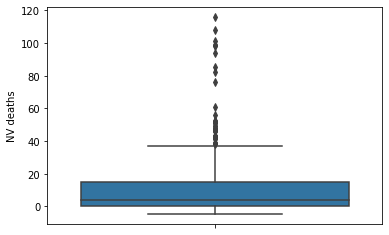

In [88]:
fig2 = sns.boxplot(y=df1['NV deaths'])

# Task 1: Outlier Detection using Tukey's Rule

In [89]:

from collections import Counter


def detect_outliers(df, n, features):
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        #print(IQR)
        # outlier step
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        #print(outlier_indices)
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        print("Outliers in")
        print(col)
        print("are")
        print(outlier_list_col.to_numpy())

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    #print(multiple_outliers)
    return multiple_outliers

# detect outliers from list of features
lof = ['NM confirmed','NV confirmed','NM deaths','NV deaths']

print(df1.describe())
# params dataset, number of outliers for rejection, list of features
Outliers_to_drop = detect_outliers(df1, 1, lof)
#print(Outliers_to_drop)
print(df1.describe())

              Date  NM confirmed  NV confirmed  NM deaths  NV deaths
count          438           438           438        438        438
unique         438           301           315         46         60
top     2020-05-16             0             0          0          0
freq             1            56            86         86        126
Outliers in
NM confirmed
are
[289 290 292 293 294 295 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 320 322 323 324 325 326 327 328 329 330
 331 332 335 337 338 343 344 345 350 351 352 353 358 359]
Outliers in
NV confirmed
are
[302 306 307 308 310 311 314 316 317 318 319 320 321 322 325 326 327 329
 331 332 334 336 339 344 347 350 351 352 353 357 358 360 363 365 373]
Outliers in
NM deaths
are
[300 305 307 310 313 315 316 317 318 322 324 326 328 329 330 331 336 337
 338 340 341 343 344 346 350 351 352 356 358 359 360 364 365 366 367 368
 372 378 385]
Outliers in
NV deaths
are
[ 85 190 211 226 316 321 323 324 325 3

# Removing Outliers

In [90]:
print(df1.describe())
dataFinal= df1[~df1.index.isin(Outliers_to_drop)]

print("Dataset information after removing the outliers: \n")
print(dataFinal.describe())
print("\n")

print("As we can observe, initially there were 438 rows and now there are 393, we have removed 45 rows")
print("\n")

              Date  NM confirmed  NV confirmed  NM deaths  NV deaths
count          438           438           438        438        438
unique         438           301           315         46         60
top     2020-05-16             0             0          0          0
freq             1            56            86         86        126
Dataset information after removing the outliers: 

              Date  NM confirmed  NV confirmed  NM deaths  NV deaths
count          393           393           393        393        393
unique         393           258           273         34         48
top     2020-08-28             0             0          0          0
freq             1            55            83         85        123


As we can observe, initially there were 438 rows and now there are 393, we have removed 45 rows




# Plotting the curves for different columns


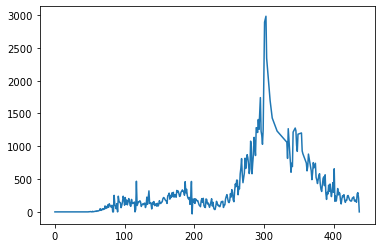

In [91]:
plt.plot(dataFinal['NM confirmed'])

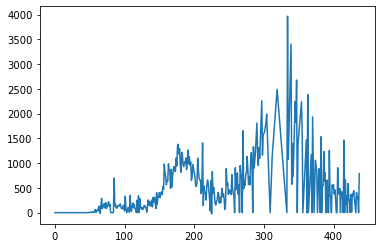

In [92]:
plt.plot(dataFinal['NV confirmed'])

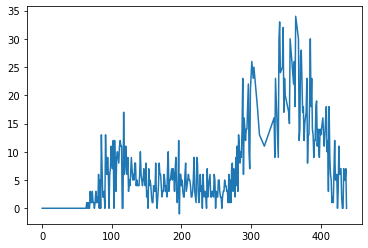

In [93]:
plt.plot(dataFinal['NM deaths'])

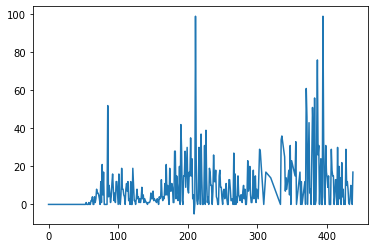

In [94]:
plt.plot(dataFinal['NV deaths'])

# Task 2a
Use your COVID19 dataset to predict the COVID19 fatality and #cases for the next one week. Use the following four prediction techniques: (i) AR(3), (ii) AR(5), (iii) EWMA with alpha = 0.5, and (iv) EWMA with alpha = 0.8. Make sure that your dataset allows you to verify the one week prediction. For example, use the first three weeks of data to predict the fourth week, and report the accuracy of your predictions using the actual fourth week data. Use metrics learned in class (MAPE as a % and MSE) to report accuracy numbers.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import math
from scipy.stats import gamma

def calculateErrors(orig,pred):
    ape = 0
    sse = 0
    n = len(orig)
    for i in range(n):
        sse += math.pow((orig[i]-pred[i]),2)
        if(orig[i] != 0):
            ape += (abs(orig[i]-pred[i])*100)/orig[i]
        
    MSE = sse/n
    MAPE = ape/n
    
    return MSE,MAPE


def calculateEWMA(data,alpha):
    
    t = 21
    y_pred = []
    for i in range(7):
        res = 0
        for j in range (t+i):
            res += pow((1-alpha),j) * data[t-j-1+i]
        
        y_pred.append(alpha*res)

    return y_pred


def calculateAR(data,ar_val,day):
        
    t = 21+day
    rows = t - ar_val
    cols = ar_val + 1
    x_mat = []

    for i in range(rows):
        temp = [1]
        for j in range(1,cols):
            temp.append(data[j-1+i])

        x_mat.append(temp)

    x_mat = np.array(x_mat)
    product_of_X_and_X_transpose = np.matmul(x_mat.T,x_mat)    
    inverseXY = np.linalg.inv(product_of_X_and_X_transpose)   
    coeff = np.matmul(np.matmul(inverseXY,x_mat.T),data[ar_val:t])

    y_pred = coeff[0]
    
    for j in  range(ar_val):
        y_pred += coeff[j+1] * data[t-j-1]
        t = t+1
    

    return y_pred


df = pd.read_csv("17.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= datetime.datetime(2020,8,1)]

print("Predicted values, MAPE and MSE for NM confirmed column using EWMA(0.5)")
data = list(df['NM confirmed'])
predicted_val = calculateEWMA(data,0.5)
print(predicted_val)
MSE,MAPE = calculateErrors(data[21:28],predicted_val)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NM confirmed column using EWMA(0.8)")
predicted_val = calculateEWMA(data,0.8)
print(predicted_val)
MSE,MAPE = calculateErrors(data[21:28],predicted_val)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NV confirmed column using EWMA(0.5)")
data = list(df['NV confirmed'])
predicted_val = calculateEWMA(data,0.5)
print(predicted_val)
MSE,MAPE = calculateErrors(data[21:28],predicted_val)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NV confirmed column using EWMA(0.8)")
predicted_val = calculateEWMA(data,0.8)
print(predicted_val)
MSE,MAPE = calculateErrors(data[21:28],predicted_val)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NM deaths column using EWMA(0.5)")
data = list(df['NM deaths'])
predicted_val = calculateEWMA(data,0.5)
print(predicted_val)
MSE,MAPE = calculateErrors(data[21:28],predicted_val)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NM deaths column using EWMA(0.8)")
predicted_val = calculateEWMA(data,0.8)
print(predicted_val)
MSE,MAPE = calculateErrors(data[21:28],predicted_val)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NV deaths column using EWMA(0.5)")
data = list(df['NV deaths'])
predicted_val = calculateEWMA(data,0.5)
print(predicted_val)
MSE,MAPE = calculateErrors(data[21:28],predicted_val)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NV deaths column using EWMA(0.8)")
predicted_val = calculateEWMA(data,0.8)
print(predicted_val)
MSE,MAPE = calculateErrors(data[21:28],predicted_val)
print("MSE: ",MSE)
print("MAPE: ",MAPE)


print("Predicted values, MAPE and MSE for NM confirmed columns using AR")
data = list(df['NM confirmed'])

predicted_cases = []
original_vals = data[21:28]
for i in range(7):
    prediction = calculateAR(data,3,i)
    predicted_cases.append(prediction)

print("Predicted confirmed cases for NM confirmed with AR = 3: ", predicted_cases)

MSE,MAPE = calculateErrors(data[21:28],predicted_cases)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

for i in range(7):
    prediction = calculateAR(data,5,i)
    predicted_cases.append(prediction)

print("Predicted confirmed cases for NM confirmed with AR = 5: ", predicted_cases)
MSE,MAPE = calculateErrors(data[21:28],predicted_cases)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NV confirmed columns using AR")
data = list(df['NV confirmed'])

predicted_cases = []
original_vals = data[21:28]
for i in range(7):
    prediction = calculateAR(data,3,i)
    predicted_cases.append(prediction)

print("Predicted confirmed cases for NV confirmed with AR = 3: ", predicted_cases)
MSE,MAPE = calculateErrors(data[21:28],predicted_cases)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

for i in range(7):
    prediction = calculateAR(data,5,i)
    predicted_cases.append(prediction)

print("Predicted confirmed cases for NV confirmed with AR = 5: ", predicted_cases)
MSE,MAPE = calculateErrors(data[21:28],predicted_cases)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NM deaths columns using AR")
data = list(df['NM deaths'])

predicted_cases = []
original_vals = data[21:28]
for i in range(7):
    prediction = calculateAR(data,3,i)
    predicted_cases.append(prediction)

print("Predicted confirmed cases for NM deaths with AR = 3: ", predicted_cases)
MSE,MAPE = calculateErrors(data[21:28],predicted_cases)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

for i in range(7):
    prediction = calculateAR(data,5,i)
    predicted_cases.append(prediction)

print("Predicted confirmed cases for NM deaths with AR = 5: ", predicted_cases)
MSE,MAPE = calculateErrors(data[21:28],predicted_cases)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

print("Predicted values, MAPE and MSE for NV deaths columns using AR")
data = list(df['NV deaths'])

predicted_cases = []
original_vals = data[21:28]
for i in range(7):
    prediction = calculateAR(data,3,i)
    predicted_cases.append(prediction)

print("Predicted confirmed cases for NV deaths with AR = 3: ", predicted_cases)
MSE,MAPE = calculateErrors(data[21:28],predicted_cases)
print("MSE: ",MSE)
print("MAPE: ",MAPE)
for i in range(7):
    prediction = calculateAR(data,5,i)
    predicted_cases.append(prediction)

print("Predicted confirmed cases for NV deaths with AR = 5: ", predicted_cases)
MSE,MAPE = calculateErrors(data[21:28],predicted_cases)
print("MSE: ",MSE)
print("MAPE: ",MAPE)

Predicted values, MAPE and MSE for NM confirmed column using EWMA(0.5)
[23939.310861587524, 24120.655430793762, 24258.32771539688, 24363.66385769844, 24449.33192884922, 24590.66596442461, 24755.332982212305]
MSE:  78805.2932280279
MAPE:  1.1128022525383556
Predicted values, MAPE and MSE for NM confirmed column using EWMA(0.8)
[24056.59500545368, 24252.919001090744, 24367.383800218147, 24448.676760043625, 24517.735352008724, 24689.14707040175, 24873.829414080345]
MSE:  32279.585409043128
MAPE:  0.6896723334742848
Predicted values, MAPE and MSE for NV confirmed column using EWMA(0.5)
[63959.48520278931, 64514.24260139465, 65057.62130069733, 65533.81065034866, 65973.40532517433, 66319.70266258717, 66756.85133129358]
MSE:  933642.5217788888
MAPE:  1.4403479135973638
Predicted values, MAPE and MSE for NV confirmed column using EWMA(0.8)
[64618.69736554923, 64978.93947310982, 65476.587894622, 65903.3175789244, 66311.0635157849, 66595.01270315696, 67074.20254063139]
MSE:  317681.56909029145
M

# Task 2b
Apply the Wald’s test, Z-test, and t-test (assume all are applicable) to check whether the mean of COVID19 deaths and #cases are different from the second-last week to the last week in your dataset. Use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. Note, you have to report results for deaths and #cases separately, so think of this as two inferences. After running the test and reporting the numbers, check and comment on whether the tests are applicable or not. First use one-sample tests by computing the mean of the second-last week data and using that as guess for last week data. Then, repeat with a two-sample version of Wald and t-tests. For t-test, use both paired and unpaired tests. Use alpha value of 0.05 for all. For t-test, the threshold to check against is tn-1, alpha/2 for two-tailed, where n is the number of data points. You can find these values in online t tables, similar to z tables. For Z-test, use the sample standard deviation of the entire covid19 dataset you have and use that as the true sigma value.

In [96]:

#feb21
feb21_data = dataFinal[(dataFinal['Date'] > '2021-01-31') & (dataFinal['Date'] < '2021-03-01')]

#march21
march21_data = dataFinal[(dataFinal['Date'] > '2021-02-28') & (dataFinal['Date'] < '2021-04-01')]



print(feb21_data)

print(march21_data)


           Date NM confirmed NV confirmed NM deaths NV deaths
376  2021-02-01          486          819        12         8
377  2021-02-02          432            0        15         0
379  2021-02-04          559          881        17        51
380  2021-02-05          582          888        23        39
381  2021-02-06          421            0         8         0
382  2021-02-07          343         1533        13        56
383  2021-02-08          311            0        13         0
384  2021-02-09          413          546        19         2
385  2021-02-10          509          541        30        36
386  2021-02-11          534         1236        18        76
387  2021-02-12          400          631        23        26
388  2021-02-13          565          810        14        31
389  2021-02-14          282            0        13         0
390  2021-02-15          190          514         9        15
391  2021-02-16          299          657        12        24
392  202

# Wald's One Sample Test

In [97]:
import numpy as np
#Assuming poison distribution
def WaldsTest(feb21Data, march21Data):
    feb21_mean = np.mean(feb21Data)
    march21_mean = np.mean(march21Data)
    #print(feb21_mean)
    #print(march21_mean)
    #In case of poisson ditribution both mean and variance are equal to lamda.
    se = np.sqrt(march21_mean/len(march21Data))
    #Computing W of wald's test
    #print(se)
    W = np.abs((march21_mean - feb21_mean)/se)
    #print(W)
    return W




#NULL HYPOTHESIS
#Mean of feb 21 cases/deaths = Mean of last march21 cases/deaths.


#call for NV confirmed cases
W=WaldsTest(feb21_data['NV confirmed'],march21_data['NV confirmed'])   
print("NV confirmed")
#alpha=0.05
Z_alphaby2 = 1.96
if(W <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(W))
else:
    print( "Reject NULL HYPOTHESIS "+ str(W))
    
    
W=WaldsTest(feb21_data['NM confirmed'],march21_data['NM confirmed'])  
print("NM confirmed")
Z_alphaby2 = 1.96
if(W <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(W))
else:
    print( "Reject NULL HYPOTHESIS "+ str(W))
    

W=WaldsTest(feb21_data['NV deaths'],march21_data['NV deaths'])   
print("NV deaths")
Z_alphaby2 = 1.96
if(W <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(W))
else:
    print( "Reject NULL HYPOTHESIS "+ str(W))


W=WaldsTest(feb21_data['NM deaths'],march21_data['NM deaths']) 
print("NM deaths")
Z_alphaby2 = 1.96
if(W <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(W))
else:
    print( "Reject NULL HYPOTHESIS "+ str(W))



NV confirmed
Reject NULL HYPOTHESIS 60.84468046051707
NM confirmed
Reject NULL HYPOTHESIS 67.27408494148042
NV deaths
Reject NULL HYPOTHESIS 23.24033583933362
NM deaths
Reject NULL HYPOTHESIS 16.413216173510026


# Hypothesis
Null hypothesis (H0):
Mean of Feb 21 confirmed cases or deaths = Mean of March 21 confirmed cases or deaths.

Alternate hypothesis(H1):
Mean of Feb 21 confirmed cases or deaths is not equal to mean of March 21 confirmed cases or deaths.

Procedure :
We have taken the guess value as March 21 cases/deaths and alpha = 0.05 as given in documentation and sample mean as Feb 21. The standard error of the estimator is calculated in above walds function.

Result:
W value for mean of Feb 21 NV confirmed cases =60.84468046051707 which is greater than 1.96 we are rejecting the NULL hypothesis. 
W value for mean of Feb 21 NM confirmed cases =67.27408494148042 which is greater than 1.96 we are rejecting the NULL hypothesis.
W value for mean of Feb 21 NV deaths =23.24033583933362 which is greater than 1.96 we are rejecting the NULL hypothesis.
W value for mean of Feb 21 NM deaths =16.413216173510026 which is greater than 1.96 we are rejecting the NULL hypothesis.

Is Test Applicable ?
The main Assumptions of Wald's test is that the sample data has to be normally dustributed. Since we are using a mean estimator which is Poisson MLE, using CLT we can say that the data is asymptomatically normal. 

Hence ,We can conclude the Wald's Test is applicable on given dataset.

# WALDS 2 SAMPLE TEST

In [98]:
#WALDS 2 SAMPLE TEST
import numpy as np
#Assuming poison distribution
def WaldsTest(feb21Data, march21Data):
    feb21_mean = np.mean(feb21Data)
    march21_mean = np.mean(march21Data)
    #print(feb21_mean)
    #print(march21_mean)
    #In case of poisson ditribution both meand and variance are equal to lamda.
    se = np.sqrt((march21_mean/len(march21Data))+feb21_mean/len(feb21Data))
    #Computing W of wald's test
    #print(se)
    W = np.abs((march21_mean - feb21_mean)/se)
    #print(W)
    return W




#NULL HYPOTHESIS
#Mean of feb 21 cases/deaths = Mean of last march21 cases/deaths.


#call for NV confirmed cases
W=WaldsTest(feb21_data['NV confirmed'],march21_data['NV confirmed'])   
print("NV confirmed")
#alpha=0.05
Z_alphaby2 = 1.96
if(W <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(W))
else:
    print( "Reject NULL HYPOTHESIS "+ str(W))
    


W=WaldsTest(feb21_data['NM confirmed'],march21_data['NM confirmed'])  
print("NM confirmed")
Z_alphaby2 = 1.96
if(W <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(W))
else:
    print( "Reject NULL HYPOTHESIS "+ str(W))


W=WaldsTest(feb21_data['NV deaths'],march21_data['NV deaths']) 
print("NM deaths")
Z_alphaby2 = 1.96
if(W <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(W))
else:
    print( "Reject NULL HYPOTHESIS "+ str(W))



W=WaldsTest(feb21_data['NM deaths'],march21_data['NM deaths'])   
print("NV deaths")
Z_alphaby2 = 1.96
if(W <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(W))
else:
    print( "Reject NULL HYPOTHESIS "+ str(W))


NV confirmed
Reject NULL HYPOTHESIS 36.00135062635395
NM confirmed
Reject NULL HYPOTHESIS 38.17819402331588
NM deaths
Reject NULL HYPOTHESIS 12.026445802057546
NV deaths
Reject NULL HYPOTHESIS 8.88072270686856


# Hypothesis
Null hypothesis (H0):
Mean of Feb 21 confirmed cases or deaths = Mean of March 21 confirmed cases or deaths.

Alternate hypothesis(H1):
Mean of Feb 21 confirmed cases or deaths is not equal to mean of March 21 confirmed cases or deaths.

Procedure :
We have taken the alpha = 0.05 as given in documentation and calculated the numerator and denominator of w in the above walds_2_sample_testing function . The standard error of the estimator is combination of the standard error of both the months data which is February 21 and March 21.

Result:
W value for mean of Feb 21 NV confirmed cases =36.00135062635395 which is greater than 1.96 we are rejecting the NULL hypothesis.
W value for mean of Feb 21 NM confirmed cases =38.17819402331588 which is greater than 1.96 we are rejecting the NULL hypothesis.
W value for mean of Feb 21 NM deaths =12.026445802057546 which is greater than 1.96 we are rejecting the NULL hypothesis.
W value for mean of Feb 21 NV deaths =8.88072270686856 which is greater than 1.96 we are rejecting the NULL hypothesis.

Is Test Applicable ?
The main Assumptions of Wald's test is that the sample data has to be normally dustributed. Since we are using a mean estimator, using CLT we can say that the data is asymptomatically normal. 

Hence ,We can conclude the Wald's Test is applicable on given dataset.

# Z test

In [99]:

import numpy as np
#Z test
#Assuming poison distribution
def ZTest(feb21Data, march21Data,true_std_deviation):
    
    feb21_mean = np.mean(feb21Data)
    march21_mean = np.mean(march21Data)
    #print(feb21_mean)
    #print(march21_mean)
    
    #true standard devation
    denominator=true_std_deviation/np.sqrt(len(march21Data))
    #Computing Z of Ztest
    Z = np.abs((march21_mean - feb21_mean)/denominator)
    #print(Z)
    return Z


#call for NV confirmed cases
true_std_deviation=np.sqrt(np.var(df['NV confirmed']))
Z=ZTest(feb21_data['NV confirmed'],march21_data['NV confirmed'],true_std_deviation)   
print("NV confirmed")
#alpha=0.05
Z_alphaby2 = 1.96
if(Z <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(Z))
else:
    print( "Reject NULL HYPOTHESIS "+ str(Z))
    
    
true_std_deviation=np.sqrt(np.var(df['NM confirmed']))
Z=ZTest(feb21_data['NM confirmed'],march21_data['NM confirmed'],true_std_deviation)  
print("NM confirmed")
Z_alphaby2 = 1.96
if(Z <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(Z))
else:
    print( "Reject NULL HYPOTHESIS "+ str(Z))


true_std_deviation=np.sqrt(np.var(df['NV deaths']))
Z=ZTest(feb21_data['NV deaths'],march21_data['NV deaths'],true_std_deviation)   
print("NV deaths")
Z_alphaby2 = 1.96
if(Z <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(Z))
else:
    print( "Reject NULL HYPOTHESIS "+ str(Z))


true_std_deviation=np.sqrt(np.var(df['NM deaths']))
Z=ZTest(feb21_data['NM deaths'],march21_data['NM deaths'],true_std_deviation) 
print("NM deaths")
Z_alphaby2 = 1.96
if(Z <= 1.96):
    print( "Accept NULL HYPOTHESIS "+ str(Z))
else:
    print( "Reject NULL HYPOTHESIS "+ str(Z))




NV confirmed
Accept NULL HYPOTHESIS 0.011833444930198571
NM confirmed
Accept NULL HYPOTHESIS 0.01463507248320475
NV deaths
Accept NULL HYPOTHESIS 0.04960885875402222
NM deaths
Accept NULL HYPOTHESIS 0.036355495694683625


# Hypothesis
Null hypothesis (H0):
Mean of Feb 21 confirmed cases or deaths = Mean of March 21 confirmed cases or deaths.

Alternate hypothesis(H1):
Mean of Feb 21 confirmed cases or deaths is not equal to mean of March 21 confirmed cases or deaths.

Procedure :
We have taken the guess value as March 21 cases/deaths and alpha = 0.05 as given in documentation and sample mean as Feb 21. We used the corrected sample standard deviation of the entire COVID19 dataset we had for each state as the true sigma value.


Result:
Z value for mean of Feb 21 NV confirmed cases = 0.011833444930198568 which is less than 1.96 we are accepting the NULL hypothesis.
Z value for mean of Feb 21 NM confirmed cases = 0.01463507248320475 which is less than 1.96 we are accepting the NULL hypothesis.
Z value for mean of Feb 21 NM deaths = 0.036355495694683625 which is less than 1.96 we are accepting the NULL hypothesis.
Z value for mean of Feb 21 NV deaths = 0.049608858754022205 which is less than 1.96 we are accepting the NULL hypothesis.

Is Test Applicable ?
The main Assumptions of Z-test are that true standard deviation is known to us, sample size has to be large or the sample data has to be normally dustributed. The true standard deviation is known to us. The data here has 400+ rows so it is large. Since we are using a mean estimator, using CLT we can say that the data is asymptomatically normal. 

Hence ,We can conclude the Z-Test is applicable on given dataset.

# T test

In [100]:
#Calculate Sample Variance
def cal_sample_variance(mean,data):
    n=len(data)
    return  np.sum(np.square(data - mean))/(n-1)
    


#T test 
def TTest(feb21Data, march21Data):
    
    feb21_mean = np.mean(feb21Data)
    march21_mean = np.mean(march21Data)
    #print(feb21_mean)
    #print(march21_mean)
    sample_variance=cal_sample_variance(march21_mean,march21Data)
    denominator = np.sqrt(sample_variance)/np.sqrt(len(march21Data))
    #computing the T statistic 
    T = np.abs((march21_mean - feb21_mean)/denominator)
    return T
    
    
#call for NV confirmed cases

T=TTest(feb21_data['NV confirmed'],march21_data['NV confirmed'])   
print("NV confirmed")
T_alpha = 1.697261
if(T <= 1.697261):
    print( "Accept NULL HYPOTHESIS "+ str(T))
else:
    print( "Reject NULL HYPOTHESIS "+ str(T))
    



T=TTest(feb21_data['NM confirmed'],march21_data['NM confirmed'])  
print("NM confirmed")
T_alpha = 1.697261
if(T <= 1.697261):
    print( "Accept NULL HYPOTHESIS "+ str(T))
else:
    print( "Reject NULL HYPOTHESIS "+ str(T))



T=TTest(feb21_data['NV deaths'],march21_data['NV deaths'])   
print("NV deaths")
T_alpha = 1.697261
if(T <= 1.697261):
    print( "Accept NULL HYPOTHESIS "+ str(T))
else:
    print( "Reject NULL HYPOTHESIS "+ str(T))



T=TTest(feb21_data['NM deaths'],march21_data['NM deaths']) 
print("NM deaths")
T_alpha = 1.697261
if(T <= 1.697261):
    print( "Accept NULL HYPOTHESIS "+ str(T))
else:
    print( "Reject NULL HYPOTHESIS "+ str(T))





NV confirmed
Reject NULL HYPOTHESIS 3.466232317733068
NM confirmed
Reject NULL HYPOTHESIS 18.584110592851285
NV deaths
Reject NULL HYPOTHESIS 7.377885488184716
NM deaths
Reject NULL HYPOTHESIS 8.436562085344791


# Hypothesis
Null hypothesis (H0):
Mean of Feb 21 confirmed cases or deaths = Mean of March 21 confirmed cases or deaths.

Alternate hypothesis(H1):
Mean of Feb 21 confirmed cases or deaths is not equal to mean of March 21 confirmed cases or deaths.

Procedure :
We have taken the alpha = 0.05 as given in documentation and degree of freedom as 30 to calculate the value of T.

Result:
T value for mean of Feb 21 NV confirmed cases = 3.466232317733068 which is greater than 1.697261 we are rejecting the NULL hypothesis.
T value for mean of Feb 21 NM confirmed cases = 18.584110592851285 which is greater than 1.697261 we are rejecting the NULL hypothesis.
T value for mean of Feb 21 NM deaths = 8.436562085344791 which is greater than 1.697261 we are rejecting the NULL hypothesis.
T value for mean of Feb 21 NV deaths = 7.377885488184716 which is greater than 1.697261 we are rejecting the NULL hypothesis.

Is Test Applicable ?
The T-test is not valid since the data points are expected to follow a Normal distribution but the given distribution to us is Poisson.

# Unpaired T test

In [101]:
#Calculate Sample Variance
def cal_sample_variance(mean,data):
    n=len(data)
    return  np.sum(np.square(data - mean))/(n-1)
    


#Unpaired T test 
def TTest(feb21Data, march21Data):
    
    feb21_mean = np.mean(feb21Data)
    march21_mean = np.mean(march21Data)
    #print(feb21_mean)
    #print(march21_mean)
    
    sample_variance_feb21=cal_sample_variance(feb21_mean,feb21Data)
    sample_variance_march21=cal_sample_variance(march21_mean,march21Data)
    
    denominator =(np.sqrt(sample_variance_feb21)/np.sqrt(len(feb21Data))) +(np.sqrt(sample_variance_march21)/np.sqrt(len(march21Data)))
    #computing the T statistic 
    T = np.abs((march21_mean - feb21_mean)/denominator)
    return T
    
    
#call for NV confirmed cases

T=TTest(feb21_data['NV confirmed'],march21_data['NV confirmed'])   
print("NV confirmed")
T_alpha = 2.000995
if(T <= 2.000995):
    print( "Accept NULL HYPOTHESIS "+ str(T))
else:
    print( "Reject NULL HYPOTHESIS "+ str(T))


T=TTest(feb21_data['NM confirmed'],march21_data['NM confirmed'])  
print("NM confirmed")
T_alpha = 2.000995
if(T <= 2.000995):
    print( "Accept NULL HYPOTHESIS "+ str(T))
else:
    print( "Reject NULL HYPOTHESIS "+ str(T))
    
    
    
T=TTest(feb21_data['NV deaths'],march21_data['NV deaths'])   
print("NV deaths")
T_alpha = 2.000995
if(T <= 2.000995):
    print( "Accept NULL HYPOTHESIS "+ str(T))
else:
    print( "Reject NULL HYPOTHESIS "+ str(T))



T=TTest(feb21_data['NM deaths'],march21_data['NM deaths']) 
print("NM deaths")
T_alpha = 2.000995
if(T <= 2.000995):
    print( "Accept NULL HYPOTHESIS "+ str(T))
else:
    print( "Reject NULL HYPOTHESIS "+ str(T))







NV confirmed
Accept NULL HYPOTHESIS 1.4149094874966222
NM confirmed
Reject NULL HYPOTHESIS 5.141872121508537
NV deaths
Accept NULL HYPOTHESIS 1.9104971125134882
NM deaths
Reject NULL HYPOTHESIS 4.223523081107441


# Hypothesis
Null hypothesis (H0):
Mean of Feb 21 confirmed cases or deaths = Mean of March 21 confirmed cases or deaths.

Alternate hypothesis(H1):
Mean of Feb 21 confirmed cases or deaths is not equal to mean of March 21 confirmed cases or deaths.

Procedure :
We have taken the alpha = 0.05 as given in documentation and degree of freedom as 30 to calculate the value of T.

Result:
T value for mean of Feb 21 NV confirmed cases = 1.4149094874966222 which is less than 2.000995 we are accepting the NULL hypothesis.
T value for mean of Feb 21 NM confirmed cases = 5.141872121508538 which is greater than 2.000995 we are rejecting the NULL hypothesis.
T value for mean of Feb 21 NM deaths = 4.223523081107441 which is greater than 2.000995 we are rejecting the NULL hypothesis.
T value for mean of Feb 21 NV deaths = 1.9104971125134882 which is less than 2.000995 we are accepting the NULL hypothesis.

Is Test Applicable ?
The T-test however is not valid since the data points are expected to follow a Normal distribution but the given distribution to us is Poisson.

# Task 2C

# KS Test

In [102]:
#!/usr/bin/env python3
# -- coding: utf-8 --

import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import geom

def OneSampleKS_Poisson(data_cases,datatype):
    row,col = data_cases.shape

    nm_confirmed_data = []
    nv_confirmed_data = []
    
    for index, row in data_cases.iterrows():
        # Oct,Nov,Dec data for both states
        if row['Date'][5] =='1':
            if datatype == 'Confirmed cases':
                nm_confirmed_data.append(row['NM confirmed'])
                nv_confirmed_data.append(row['NV confirmed'])
            
            else:
                nm_confirmed_data.append(row['NM deaths'])
                nv_confirmed_data.append(row['NV deaths'])
        
    # Lambda mme using first state data
    mme_lambda = float(np.sum(nm_confirmed_data)) / float(len(nm_confirmed_data))
    
    # Find ecdf of second data
    nv_confirmed_data.sort()
    DL_second = len(nv_confirmed_data)
    sdata_ecdf = []
    step_size = 1 / DL_second
    step = 0
    for j in range(DL_second - 1):
        step += step_size
        sdata_ecdf.append(step)
    
    sdata_ecdf.append(1) 

    maxd = 0
    print("mme_lambda: ",mme_lambda)
    # Iterating over all the data points to calculate difference
    for k in range(DL_second):
        
        cdfap = poisson.cdf(nv_confirmed_data[k], mme_lambda)

        if k == 0:
            l_ecdf = 0
        else:
            l_ecdf = sdata_ecdf[k-1]

        r_ecdf = sdata_ecdf[k]
        
        diff_l_ecdf = abs(cdfap - l_ecdf)
        diff_r_ecdf = abs(cdfap - r_ecdf)
        
        difference = max(diff_l_ecdf,diff_r_ecdf)
        if maxd < difference:
            maxd = difference

    print("\nMaximum Difference: ", maxd)
    c = 0.05
    # Comparing maximum difference with critical value
    if(maxd > c):
        print("Null hypothesis is rejected as Oct-Dec 2020 data for the second state does not have the distribution with the obtained MME parameters for ", datatype)
    else:
        print("Null hypothesis is accepted as Oct-Dec 2020 data for the second state have the distribution with the obtained MME parameters for ", datatype)
    
    
def OneSampleKS_Geometric(data_cases,datatype):
    row,col = data_cases.shape

    nm_confirmed_data = []
    nv_confirmed_data = []
    
    for index, row in data_cases.iterrows():
        # Oct,Nov,Dec data for both states
        if row['Date'][5] =='1':
            if datatype == 'Confirmed cases':
                nm_confirmed_data.append(row['NM confirmed'])
                nv_confirmed_data.append(row['NV confirmed'])
            
            else:
                nm_confirmed_data.append(row['NM deaths'])
                nv_confirmed_data.append(row['NV deaths'])
    
    # geometric P mme using first state data
    mme_p=  float(len(nm_confirmed_data)) / float(np.sum(nm_confirmed_data))
    
    # Find ecdf of second data
    nv_confirmed_data.sort()
    DL_second = len(nv_confirmed_data)
    sdata_ecdf = []
    step_size = 1 / DL_second
    step = 0
    for j in range(DL_second - 1):
        step += step_size
        sdata_ecdf.append(step)
    
    sdata_ecdf.append(1) 

    maxd = 0
    print("mme_p: ",mme_p)
    # Iterating over all the data points to calculate difference
    for k in range(DL_second):
        
        cdfap = geom.cdf(nv_confirmed_data[k], mme_p)

        if k == 0:
            l_ecdf = 0
        else:
            l_ecdf = sdata_ecdf[k-1]

        r_ecdf = sdata_ecdf[k]
        
        diff_l_ecdf = abs(cdfap - l_ecdf)
        diff_r_ecdf = abs(cdfap - r_ecdf)
      
        difference = max(diff_l_ecdf,diff_r_ecdf)
        if maxd < difference:
            maxd = difference

    print("\nMaximum Difference: ", maxd)
    c = 0.05
    # Comparing maximum difference with critical value
    if(maxd > c):
        print("Null hypothesis is rejected as Oct-Dec 2020 data for the second state does not have the distribution with the obtained MME parameters for ", datatype)
    else:
        print("Null hypothesis is accepted as Oct-Dec 2020 data for the second state have the distribution with the obtained MME parameters for ", datatype)
        
        
def OneSampleKS_Binomial(data_cases,datatype):
    row,col = data_cases.shape

    nm_confirmed_data = []
    nv_confirmed_data = []
    
    for index, row in data_cases.iterrows():
        # Oct,Nov,Dec data for both states
        if row['Date'][5] =='1':
            if datatype == 'Confirmed cases':
                nm_confirmed_data.append(row['NM confirmed'])
                nv_confirmed_data.append(row['NV confirmed'])
            
            else:
                nm_confirmed_data.append(row['NM deaths'])
                nv_confirmed_data.append(row['NV deaths'])
    
    
    # Binomial mme_pand mme_n using first state data
    sample_variance = np.var(nm_confirmed_data)
    sample_mean = float(np.sum(nm_confirmed_data)) / float(len(nm_confirmed_data))
    mme_n = pow(sample_mean,2) / (sample_mean - sample_variance)
    mme_p=  1 - (sample_variance/sample_mean)
    
    # Find ecdf of second data
    nv_confirmed_data.sort()
    DL_second = len(nv_confirmed_data)
    sdata_ecdf = []
    step_size = 1 / DL_second
    step = 0
    for j in range(DL_second - 1):
        step += step_size
        sdata_ecdf.append(step)
    
    sdata_ecdf.append(1) 

    maxd = 0
    print("mme_p: ",mme_p)
    print("mme_n: ",mme_n)
    # Iterating over all the data points to calculate difference
    for k in range(DL_second):
        
        cdfap = binom.cdf(nv_confirmed_data[k], mme_n, mme_p)

        if k == 0:
            l_ecdf = 0
        else:
            l_ecdf = sdata_ecdf[k-1]

        r_ecdf = sdata_ecdf[k]
        
        diff_l_ecdf = abs(cdfap - l_ecdf)
        diff_r_ecdf = abs(cdfap - r_ecdf)
      
        difference = max(diff_l_ecdf,diff_r_ecdf)
        if maxd < difference:
            maxd = difference

    print("\nMaximum Difference: ", maxd)
    c = 0.05
    # Comparing maximum difference with critical value
    if(maxd > c):
        print("Null hypothesis is rejected as Oct-Dec 2020 data for the second state does not have the distribution with the obtained MME parameters for ", datatype)
    else:
        print("Null hypothesis is accepted as Oct-Dec 2020 data for the second state has the distribution with the obtained MME parameters for ", datatype)
    



var1 = ['Date','NM confirmed','NV confirmed']   
#data_cases = pd.read_csv('cleaned_data.csv',usecols = var1)     
data_cases = dataFinal
datatype = 'Confirmed cases'

print("Checking equality of distributions for confirmed cases in 2 states using Poisson distribution")
OneSampleKS_Poisson(data_cases,datatype)
print("")
print("Checking equality of distributions for confirmed cases in 2 states using Geometric distribution")
OneSampleKS_Geometric(data_cases,datatype)
print("")
print("Checking equality of distributions for confirmed cases in 2 states using Binomial distribution")
OneSampleKS_Binomial(data_cases,datatype)



var2 = ['Date','NM deaths','NV deaths']   
data_deaths = pd.read_csv('cleaned_data.csv',usecols = var2)     
datatype = 'Deaths'
print("")
print("Checking equality of distributions for deaths in 2 states using Poisson distribution")
OneSampleKS_Poisson(data_deaths,datatype)
print("")
print("Checking equality of distributions for deaths in 2 states using Geometric distribution")
OneSampleKS_Geometric(data_deaths,datatype)
print("")
print("Checking equality of distributions for deaths in 2 states using Binomial distribution")
OneSampleKS_Binomial(data_deaths,datatype)

Checking equality of distributions for confirmed cases in 2 states using Poisson distribution
mme_lambda:  916.5

Maximum Difference:  0.46659659496804107
Null hypothesis is rejected as Oct-Dec 2020 data for the second state does not have the distribution with the obtained MME parameters for  Confirmed cases

Checking equality of distributions for confirmed cases in 2 states using Geometric distribution
mme_p:  0.0010911074740861974

Maximum Difference:  0.23595778230524775
Null hypothesis is rejected as Oct-Dec 2020 data for the second state does not have the distribution with the obtained MME parameters for  Confirmed cases

Checking equality of distributions for confirmed cases in 2 states using Binomial distribution
mme_p:  -354.76375704673575
mme_n:  -2.583409330280777

Maximum Difference:  1.0
Null hypothesis is rejected as Oct-Dec 2020 data for the second state does not have the distribution with the obtained MME parameters for  Confirmed cases

Checking equality of distribution

# Permutation Test

In [103]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import random


def funcgetpval(confirmed_data, len_confirmed_data, observed_T, num_permutation):

    cnt = 0
    
    for tr in range(0, num_permutation):
        temp_data = np.array(confirmed_data)
        random.shuffle((temp_data))
        
        data1 = temp_data[0:len_confirmed_data]
        data2 = temp_data[len_confirmed_data:]
        
        mean_data1 = np.mean(data1)
        mean_data2 = np.mean(data2)
        
        diff_mean = abs(mean_data1 - mean_data2)
        
        if diff_mean > observed_T:
            cnt+=1
    
    p_val = cnt/num_permutation
    return p_val
 

var1 = ['Date','NM confirmed','NV confirmed']   
#c_data = pd.read_csv('cleaned_data.csv',usecols = var1)
c_data = dataFinal

row,col = c_data.shape

nm_confirmed_data = []
nv_confirmed_data = []

for index, row in c_data.iterrows():
    # Fetching OCt, Nov, Dec data
    if row['Date'][5] =='1':
        nm_confirmed_data.append(row['NM confirmed'])
        nv_confirmed_data.append(row['NV confirmed'])
   

len_nm_confirmed_data = len(nm_confirmed_data)
len_nv_confirmed_data = len(nv_confirmed_data)

mean_of_nm_confirmed_data = np.mean(nm_confirmed_data)

mean_of_nv_confirmed_data = np.mean(nv_confirmed_data)

observed_T = abs(mean_of_nm_confirmed_data - mean_of_nv_confirmed_data)

print("Permutation test for daily confirmed data for New Mexico and Nevada")
print("observed_T= ",observed_T)
print("alpha = ",0.05)

confirmed_data = np.concatenate((nm_confirmed_data, nv_confirmed_data))

p_val = funcgetpval(confirmed_data,len_nm_confirmed_data,observed_T,1000)
print("For n = 1000 random permutations, p_value: ", p_val)
print("Therefore, NULL hypothesis for ",1000, "permutations can be rejected as p-value is less than alpha")

print("")
print("")

print("Permutation test for daily deaths data for Georgia and Hawai")
var2 = ['Date','NM deaths','NV deaths']
data_deaths = pd.read_csv('cleaned_data.csv',usecols = var2)

row,col = data_deaths.shape

nv_deaths_data = []
nm_deaths_data = []

for index, row in data_deaths.iterrows():
    # Fetching OCt, Nov, Dec data
    if row['Date'][5] =='1':
        nm_deaths_data.append(row['NM deaths'])
        nv_deaths_data.append(row['NV deaths'])


len_nm_deaths_data = len(nm_deaths_data)
len_nv_deaths_data = len(nv_deaths_data)

nm_deaths_mean = np.mean(nm_deaths_data)
nv_deaths_mean = np.mean(nv_deaths_data)

observed_T = abs(nm_deaths_mean - nv_deaths_mean)

print("observed_T= ",observed_T)
print("alpha = ",0.05)

confirmed_data = np.concatenate((nm_deaths_data, nv_deaths_data))

p_val = funcgetpval(confirmed_data,len_nv_deaths_data,observed_T,1000)
print("For n = 1000 random permutations, p_value: ", p_val)
print("Therefore, NULL hypothesis for ",1000, "permutations can be rejected as p-value is less than alpha")

Permutation test for daily confirmed data for New Mexico and Nevada
observed_T=  110.9666666666667
alpha =  0.05
For n = 1000 random permutations, p_value:  0.362
Therefore, NULL hypothesis for  1000 permutations can be rejected as p-value is less than alpha


Permutation test for daily deaths data for Georgia and Hawai
observed_T=  1.3152173913043477
alpha =  0.05
For n = 1000 random permutations, p_value:  0.577
Therefore, NULL hypothesis for  1000 permutations can be rejected as p-value is less than alpha


# Task 2D

Lambda after first 4 weeks is  7.392857142857143
Lambda after first 5 weeks is  7.485714285714286
Lambda after first 6 weeks is  8.404761904761905
Lambda after first 7 weeks is  8.83673469387755
Lambda after first 8 weeks is  10.053571428571429


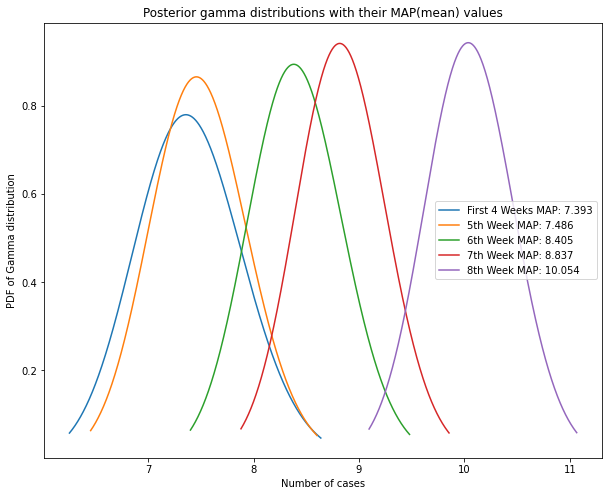

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import math
from scipy.stats import gamma

def plot_gamma(alpha, beta, label):
    x = np.linspace(gamma.ppf(0.01, alpha, scale=1/beta),
                      gamma.ppf(0.99, alpha, scale=1/beta), 1000)
  
    plt.title("Posterior gamma distributions with their MAP(mean) values")
    label = label + "MAP: " + str(round((alpha/beta),3))
    plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), label=label)
    plt.xlabel("Number of cases")
    plt.ylabel("PDF of Gamma distribution")
    plt.legend()

df = pd.read_csv("Cleaned_data.csv")
#df = dataFinal

df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= datetime.datetime(2020,6,1)]
#df = df[df['Date'] >= '06-01-2020']

df['data'] = df['NM deaths'] + df['NV deaths']
data = list(df['data'])


# Plotting the data for first 4 weeks. This data is used as a prior distribution
# Every week data is then added to the original data to get posterior

plt.figure(figsize=(10,8))
plot_gamma(sum(data[:28])+1,len(data[:28]) + len(data[:28])/sum(data[:28]),'First 4 Weeks ')
print("Lambda after first 4 weeks is ",np.mean(data[:28]))
plot_gamma(sum(data[:35])+1,len(data[:35]) + len(data[:35])/sum(data[:35]),'5th Week ')
print("Lambda after first 5 weeks is ",np.mean(data[:35]))
plot_gamma(sum(data[:42])+1,len(data[:42]) + len(data[:42])/sum(data[:42]),'6th Week ')
print("Lambda after first 6 weeks is ",np.mean(data[:42]))
plot_gamma(sum(data[:49])+1,len(data[:49]) + len(data[:49])/sum(data[:49]),'7th Week ')
print("Lambda after first 7 weeks is ",np.mean(data[:49]))
plot_gamma(sum(data[:56])+1,len(data[:56]) + len(data[:56])/sum(data[:56]),'8th Week ')
print("Lambda after first 8 weeks is ",np.mean(data[:56]))
plt.show()
